In [71]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim


## params

In [85]:
crop_size = 300
learning_rate = 0.01
num_epochs = 501


## read image

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_25704/1965883659.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./ca.jpg')[..., :3] / 255.0


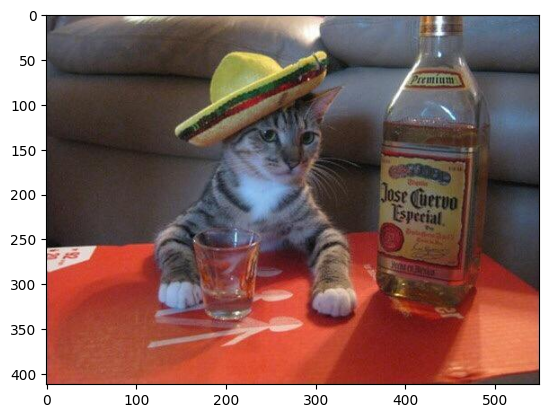

(412, 550, 3)


In [73]:
img = imageio.imread('./ca.jpg')[..., :3] / 255.0
# img_data = ImageData(img)
# img = (img * 255).astype(np.uint8)
plt.imshow(img)
plt.show()

print(img.shape)


## convert to tensor

In [74]:
# make tensor and (channel, height, width)
img_tensor = torch.Tensor(img).permute(2, 0, 1)
img_crop = transforms.CenterCrop(crop_size)(img_tensor)
# img_crop = img_crop.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

## flatten tensor to [crop_size ** 2, 3]


In [75]:
# for mlp
# img_flat = torch.reshape(img_crop, (crop_size * crop_size, 3))
# img_flat.shape

In [76]:
img_crop.shape

torch.Size([3, 300, 300])

## create the mesh grid

In [77]:
# for mlp
# xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
# xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
# x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
# xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
# xy_flat = torch.reshape(xy_coord_tensor, (crop_size * crop_size, 2))
# xy_flat.shape

In [78]:
# for CNN
xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
xy_coord_tensor = xy_coord_tensor.unsqueeze(0).permute(0, 3, 1, 2)
xy_coord_tensor.shape

torch.Size([1, 2, 300, 300])

## mlp

In [79]:
# class MLP(nn.Module):
#     def __init__(self, in_features, hidden_features, out_features):
#         super().__init__()

#         self.flatten = nn.Flatten()

#         self.neural_net = nn.Sequential(
            
#             # layer 1
#             nn.Linear(in_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 2
#             nn.Linear(hidden_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 3
#             nn.Linear(hidden_features, out_features),
#             nn.Sigmoid()

#         )

#     def forward(self, x):
#         return self.neural_net(x)


In [80]:
# class MLP(torch.nn.Module):
#     def __init__(
#         self,
#         in_features: int,
#         hidden_features: int,
#         hidden_layers: int,
#         out_features: int
#     ):
#         super().__init__()
#         out_features = out_features if out_features is not None else hidden_features
#         self.net = torch.nn.Sequential(
#             torch.nn.Linear(in_features, hidden_features),
#             torch.nn.ReLU(),
#             *[torch.nn.Sequential(
#                 torch.nn.Linear(hidden_features, hidden_features),
#                 torch.nn.ReLU()
#             ) for _ in range(hidden_layers)],
#             torch.nn.Linear(hidden_features, out_features)
#         )
#     def forward(self, x: torch.Tensor):
#         return self.net(x)


In [81]:

model = nn.Sequential(
        nn.Conv2d(
            2,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            3,
            kernel_size=1,
            padding=0),
        nn.Sigmoid(),

    )

## Declare network

In [82]:
# for mlp
# net = MLP(in_features=2, hidden_features=300, out_features=3)
# net

In [83]:
# net = MLP(in_features=2, hidden_features=256, hidden_layers=2, out_features=3)

## train

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_25704/87377184.py:24: UserWarning: Using a target size (torch.Size([3, 300, 300])) that is different to the input size (torch.Size([1, 3, 300, 300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.l1_loss(generated, target)


Epoch 0, loss = 0.233
[[[ 70  65  63]
  [ 62  60  58]
  [ 57  56  56]
  ...
  [184 185 187]
  [190 192 195]
  [197 200 202]]

 [[ 59  57  55]
  [ 54  52  52]
  [ 51  51  51]
  ...
  [180 181 183]
  [185 187 189]
  [192 194 197]]

 [[ 50  49  48]
  [ 48  48  47]
  [ 47  47  47]
  ...
  [175 176 178]
  [180 183 185]
  [187 189 191]]

 ...

 [[194 194 194]
  [194 194 194]
  [194 194 194]
  ...
  [205 206 207]
  [207 208 209]
  [210 210 211]]

 [[195 197 198]
  [198 198 198]
  [198 198 198]
  ...
  [207 208 209]
  [210 210 211]
  [212 213 213]]

 [[196 197 199]
  [200 201 202]
  [202 202 201]
  ...
  [210 210 211]
  [212 213 213]
  [214 214 215]]]


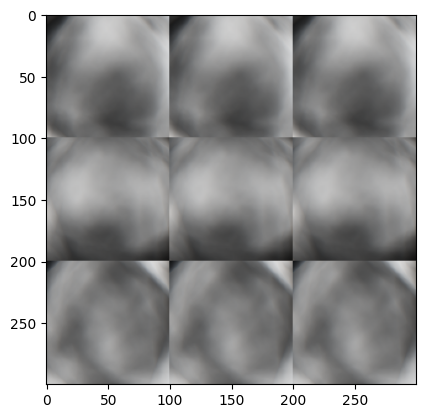

Epoch 100, loss = 0.074
[[[ 32  33  33]
  [ 34  34  34]
  [ 35  35  35]
  ...
  [108 108 108]
  [108 109 109]
  [109 109 109]]

 [[ 34  34  35]
  [ 35  35  36]
  [ 36  36  37]
  ...
  [109 109 110]
  [110 110 110]
  [110 110 111]]

 [[ 35  36  36]
  [ 36  37  37]
  [ 37  38  38]
  ...
  [110 111 111]
  [111 111 111]
  [111 112 112]]

 ...

 [[101 100  99]
  [ 98  97  96]
  [ 95  94  94]
  ...
  [ 15  15  15]
  [ 15  15  14]
  [ 14  14  14]]

 [[ 99  98  97]
  [ 97  96  95]
  [ 94  93  92]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 13  13  13]]

 [[ 98  97  96]
  [ 95  94  93]
  [ 93  92  91]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  12  12]]]


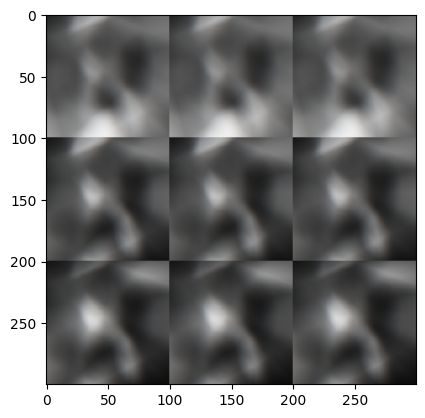

Epoch 200, loss = 0.066
[[[ 37  37  37]
  [ 37  38  38]
  [ 38  39  39]
  ...
  [104 104 105]
  [106 106 107]
  [107 108 108]]

 [[ 38  38  39]
  [ 39  39  39]
  [ 40  40  40]
  ...
  [115 116 116]
  [116 117 117]
  [117 117 117]]

 [[ 39  40  40]
  [ 40  41  41]
  [ 41  42  42]
  ...
  [123 123 123]
  [123 123 123]
  [123 123 123]]

 ...

 [[ 71  70  69]
  [ 68  67  67]
  [ 66  65  64]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 62  62  61]
  [ 60  60  59]
  [ 58  57  57]
  ...
  [ 13  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 55  54  54]
  [ 53  52  52]
  [ 51  51  50]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 12  12  13]]]


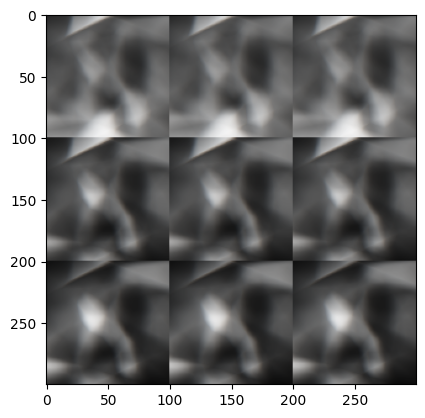

Epoch 300, loss = 0.062
[[[ 45  46  46]
  [ 47  47  47]
  [ 48  48  49]
  ...
  [ 94  94  95]
  [ 95  96  96]
  [ 97  97  97]]

 [[ 47  47  48]
  [ 48  49  49]
  [ 49  50  50]
  ...
  [101 101 102]
  [102 102 102]
  [103 103 103]]

 [[ 49  49  50]
  [ 50  50  51]
  [ 51  52  52]
  ...
  [107 107 107]
  [107 107 107]
  [108 108 108]]

 ...

 [[ 91  91  91]
  [ 91  91  91]
  [ 90  90  90]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]]

 [[ 81  81  81]
  [ 81  81  81]
  [ 80  80  80]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 71  71  71]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  10  10]]]


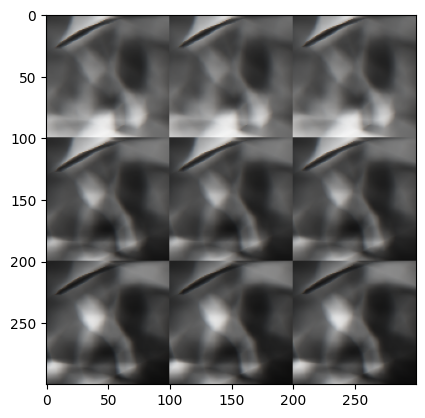

Epoch 400, loss = 0.060
[[[ 45  45  45]
  [ 46  46  47]
  [ 47  47  48]
  ...
  [107 108 109]
  [110 111 111]
  [112 113 113]]

 [[ 45  45  46]
  [ 46  46  47]
  [ 47  47  48]
  ...
  [121 121 122]
  [122 122 123]
  [123 123 124]]

 [[ 45  45  46]
  [ 46  46  47]
  [ 47  48  48]
  ...
  [127 128 128]
  [128 129 129]
  [129 130 130]]

 ...

 [[ 55  55  55]
  [ 55  55  55]
  [ 55  55  54]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 46  46  46]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 38  38  38]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]]


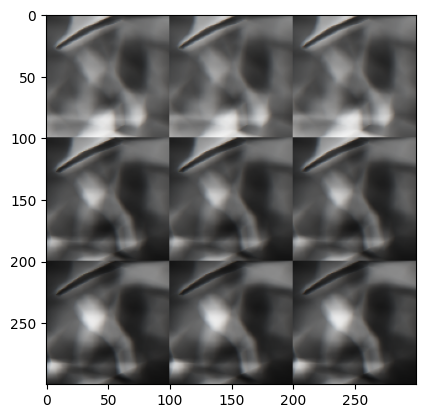

Epoch 500, loss = 0.055
[[[ 50  51  51]
  [ 52  52  53]
  [ 53  54  54]
  ...
  [105 106 107]
  [108 109 110]
  [111 112 113]]

 [[ 49  49  50]
  [ 50  51  51]
  [ 52  52  53]
  ...
  [120 120 120]
  [121 121 122]
  [122 122 123]]

 [[ 48  48  49]
  [ 49  49  50]
  [ 50  51  51]
  ...
  [127 127 127]
  [128 128 128]
  [129 129 130]]

 ...

 [[ 82  82  81]
  [ 81  80  80]
  [ 80  79  79]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  14]]

 [[ 71  71  71]
  [ 70  70  70]
  [ 69  69  69]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  14]]

 [[ 62  62  62]
  [ 61  61  61]
  [ 60  60  60]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  14]]]


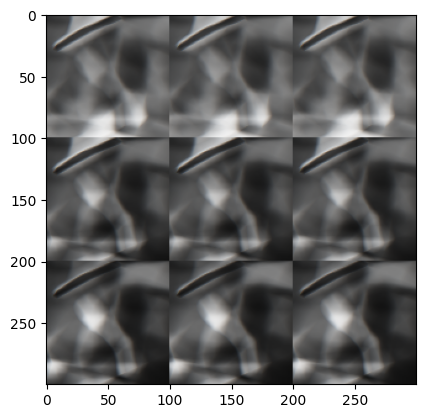

Epoch 600, loss = 0.051
[[[ 56  57  57]
  [ 58  58  59]
  [ 59  60  60]
  ...
  [112 114 115]
  [116 118 119]
  [120 122 122]]

 [[ 53  53  54]
  [ 54  55  55]
  [ 56  56  57]
  ...
  [126 127 128]
  [128 129 129]
  [130 131 131]]

 [[ 49  50  50]
  [ 51  51  52]
  [ 52  52  53]
  ...
  [132 133 134]
  [134 135 135]
  [136 136 137]]

 ...

 [[ 72  72  71]
  [ 71  70  70]
  [ 70  69  69]
  ...
  [ 24  24  23]
  [ 23  23  23]
  [ 23  23  23]]

 [[ 63  62  62]
  [ 61  61  60]
  [ 60  60  59]
  ...
  [ 24  24  24]
  [ 24  24  23]
  [ 23  23  23]]

 [[ 54  54  53]
  [ 53  53  53]
  [ 52  52  52]
  ...
  [ 24  24  24]
  [ 24  24  24]
  [ 24  23  23]]]


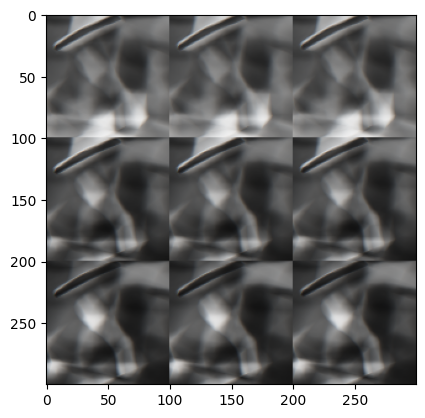

Epoch 700, loss = 0.052
[[[ 49  50  51]
  [ 51  52  52]
  [ 53  54  54]
  ...
  [ 96  97  98]
  [ 99 100 101]
  [102 102 103]]

 [[ 46  46  47]
  [ 47  48  48]
  [ 49  49  50]
  ...
  [106 106 106]
  [107 107 108]
  [108 108 109]]

 [[ 42  42  43]
  [ 43  44  44]
  [ 45  45  46]
  ...
  [111 112 112]
  [112 113 113]
  [113 114 114]]

 ...

 [[ 57  57  57]
  [ 56  56  56]
  [ 56  56  55]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  14]]

 [[ 48  48  48]
  [ 48  47  47]
  [ 47  47  46]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[ 41  41  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]]


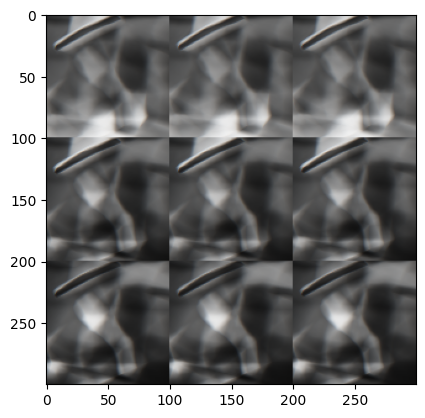

Epoch 800, loss = 0.051
[[[ 55  56  56]
  [ 57  57  58]
  [ 59  59  60]
  ...
  [123 125 126]
  [127 129 130]
  [131 132 133]]

 [[ 49  50  50]
  [ 51  51  52]
  [ 52  53  53]
  ...
  [135 135 136]
  [137 137 138]
  [138 139 140]]

 [[ 44  44  45]
  [ 45  45  46]
  [ 46  47  47]
  ...
  [140 141 141]
  [142 143 143]
  [144 144 145]]

 ...

 [[ 68  67  67]
  [ 67  66  66]
  [ 66  65  65]
  ...
  [ 22  22  22]
  [ 22  22  22]
  [ 21  21  21]]

 [[ 58  58  58]
  [ 58  57  57]
  [ 57  57  57]
  ...
  [ 23  23  23]
  [ 23  23  23]
  [ 23  22  22]]

 [[ 50  50  50]
  [ 50  50  50]
  [ 50  49  49]
  ...
  [ 24  24  24]
  [ 24  24  24]
  [ 23  23  23]]]


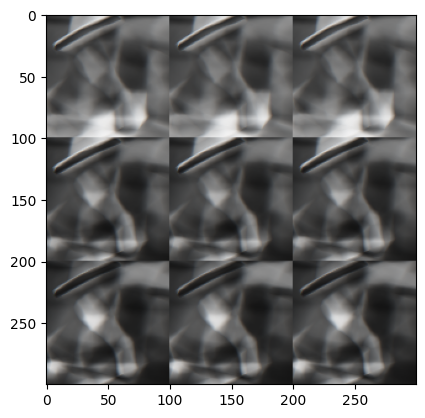

Epoch 900, loss = 0.049
[[[ 64  64  65]
  [ 65  66  66]
  [ 67  68  68]
  ...
  [122 123 125]
  [126 127 129]
  [130 131 132]]

 [[ 56  57  57]
  [ 57  58  58]
  [ 59  59  60]
  ...
  [132 133 134]
  [135 135 136]
  [137 137 138]]

 [[ 49  49  50]
  [ 50  50  51]
  [ 51  51  52]
  ...
  [137 138 139]
  [139 140 141]
  [141 142 143]]

 ...

 [[ 78  77  77]
  [ 76  76  76]
  [ 75  75  75]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [ 17  17  17]]

 [[ 68  67  67]
  [ 66  66  66]
  [ 65  65  65]
  ...
  [ 19  18  18]
  [ 18  18  18]
  [ 18  18  18]]

 [[ 59  58  58]
  [ 58  57  57]
  [ 57  57  57]
  ...
  [ 19  19  19]
  [ 19  18  18]
  [ 18  18  18]]]


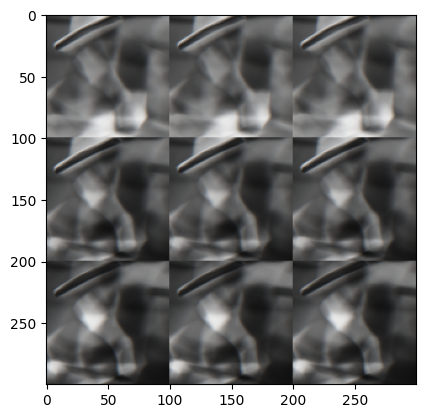

Epoch 1000, loss = 0.048
[[[ 54  54  55]
  [ 55  56  56]
  [ 57  57  57]
  ...
  [117 118 120]
  [121 122 124]
  [124 125 126]]

 [[ 47  47  47]
  [ 48  48  48]
  [ 49  49  49]
  ...
  [127 127 128]
  [129 129 130]
  [131 131 132]]

 [[ 40  40  41]
  [ 41  41  41]
  [ 42  42  42]
  ...
  [131 132 132]
  [133 134 134]
  [135 136 136]]

 ...

 [[ 76  76  76]
  [ 76  76  76]
  [ 76  76  76]
  ...
  [ 22  22  22]
  [ 22  23  23]
  [ 23  23  23]]

 [[ 66  67  67]
  [ 67  67  67]
  [ 67  67  67]
  ...
  [ 24  24  24]
  [ 24  24  24]
  [ 24  24  24]]

 [[ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]
  ...
  [ 25  25  25]
  [ 25  25  25]
  [ 25  25  25]]]


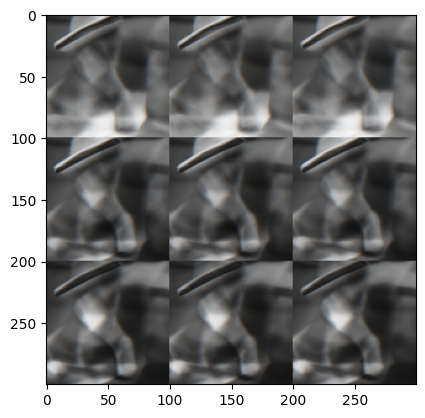

Sequential(
  (0): Conv2d(2, 300, kernel_size=(1, 1), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(300, 300, kernel_size=(1, 1), stride=(1, 1))
  (4): ReLU()
  (5): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(300, 300, kernel_size=(1, 1), stride=(1, 1))
  (7): ReLU()
  (8): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(300, 3, kernel_size=(1, 1), stride=(1, 1))
  (10): Sigmoid()
)

In [84]:
# for mlp
# criterion = nn.MSELoss()

# model = net

# target = img_flat

# for cnn
target = img_crop

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    # generated = model(xy_flat)

    # for cnn
    generated = model(xy_coord_tensor)

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(generated, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.reshape((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        # print(generated[0])
        generated = (generated * 255).astype(np.uint8)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        print(generated)
        plt.imshow(generated)
        plt.show()
model.eval()